In [1]:
from IPython.display import display
from IPython.display import clear_output

import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')



In [2]:
!pip install praw
import praw
reddit= praw.Reddit(client_id='wm0tUOahG4xwtQ', client_secret='YEww466YN6EGAuixnQXPd0yHbzk', user_agent='mythili_rajendra')



In [3]:
headlines= set()

In [4]:
for submission in reddit.subreddit('politics').new(limit=None):
    headlines.add(submission.title)
    
print(len(headlines))
   


970


In [5]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sia= SIA()
results=[]
for line in headlines:
    pol_score=sia.polarity_scores(line)
    pol_score['headline']= line
    results.append(pol_score)


In [7]:
pprint(results[:4], width=100)

[{'compound': 0.0,
  'headline': 'Trump campaign flying anti-socialism banner above Democratic debate',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.0,
  'headline': 'US concluded Israel likely planted surveillance devices near White House: report',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': -0.296,
  'headline': "This Liberal Group's Website Was Deemed Porn by the Trump Administration - No one "
              'thinks the citizen advocacy group Public Citizen is racey. And yet, for months, its '
              'website was being deemed adult content by the Department of Education’s web filter.',
  'neg': 0.053,
  'neu': 0.947,
  'pos': 0.0},
 {'compound': 0.0,
  'headline': 'Report: Sen. Mike Lee Discussed Loosening Sanctions Against Russia During Moscow '
              'Visit',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0}]


In [8]:
df= pd.DataFrame.from_records(results)
df.head(6)


,compound,headline,neg,neu,pos
0,0.0000,Trump campaign flying anti-socialism banner ab...,0.000,1.000,0.0
1,0.0000,US concluded Israel likely planted surveillanc...,0.000,1.000,0.0
2,-0.2960,This Liberal Group's Website Was Deemed Porn b...,0.053,0.947,0.0
3,0.0000,Report: Sen. Mike Lee Discussed Loosening Sanc...,0.000,1.000,0.0
4,-0.6249,"Another Flint? Newark, NJ, Faces Public Health...",0.227,0.773,0.0
5,-0.2263,Watch live: Greta Thunberg joins protesters ou...,0.160,0.840,0.0


In [9]:
df['label']=0
df.loc[df['compound']>0.2,'label']=1
df.loc[df['compound']<-0.2,'label']=-1


In [10]:
df.head(6)

,compound,headline,neg,neu,pos,label
0,0.0000,Trump campaign flying anti-socialism banner ab...,0.000,1.000,0.0,0
1,0.0000,US concluded Israel likely planted surveillanc...,0.000,1.000,0.0,0
2,-0.2960,This Liberal Group's Website Was Deemed Porn b...,0.053,0.947,0.0,-1
3,0.0000,Report: Sen. Mike Lee Discussed Loosening Sanc...,0.000,1.000,0.0,0
4,-0.6249,"Another Flint? Newark, NJ, Faces Public Health...",0.227,0.773,0.0,-1
5,-0.2263,Watch live: Greta Thunberg joins protesters ou...,0.160,0.840,0.0,-1


In [13]:
df2=df[['headline','label']]
df2.to_csv('reddit_headline_sentiment_analysis.csv',mode='a',encoding='utf-8',index=False) 

In [14]:
print('positive headlines:\n')
pprint(list(df[df['label'] == 1].headline)[:7], width=200)

print('negative headlines:\n')
pprint(list(df[df['label'] == -1].headline)[:7], width=400)

positive headlines:

['Poll: Warren, Sanders, Yang Won the Democratic Debate',
 'The Case Against Trump Profiting From the Presidency Is Back On — The decision by the U.S. second circuit court of appeals marks a breakthrough for those who accuse Trump of breaching the '
 'Constitution’s so-called emoluments clause.',
 'Mystery Solved: Private-Equity-Backed Firms Are Behind Ad Blitz on ‘Surprise Billing’',
 'Democratic debate 2019: Beto O’Rourke vows, ‘Hell, yes, we’re going to take your AR-15’',
 'Chairman Schiff Issues Subpoena for Whistleblower Complaint Being Unlawfully Withheld by Acting DNI from Intelligence Committees',
 "Ted Cruz: 'I Hope To Run' For President Again",
 'Joe Biden has his best debate night -- and that might be good enough']
negative headlines:

["This Liberal Group's Website Was Deemed Porn by the Trump Administration - No one thinks the citizen advocacy group Public Citizen is racey. And yet, for months, its website was being deemed adult content by the Departme

In [16]:
print(df.label.value_counts())
print(df.label.value_counts(normalize=True)*100)

 0    372
-1    340
 1    258
Name: label, dtype: int64
 0    38.350515
-1    35.051546
 1    26.597938
Name: label, dtype: float64


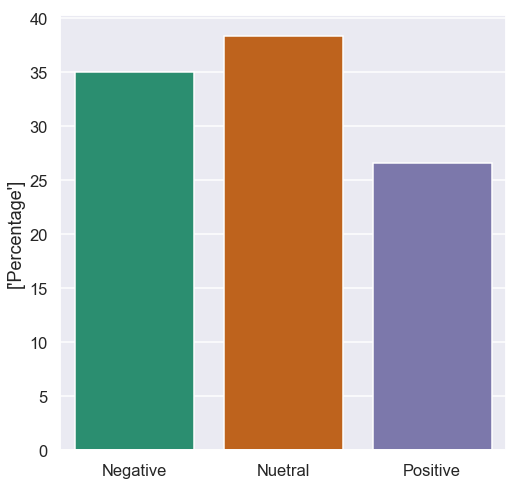

In [17]:
fig, ax= plt.subplots(figsize=(8,8))
counts= df.label.value_counts(normalize=True)*100
sns.barplot(x=counts.index,y=counts,ax=ax)
ax.set_xticklabels(['Negative','Nuetral','Positive'])
ax.set_ylabel(['Percentage'])
plt.show()
